Gold Price Prediction Using Random Forest Regression

In [2]:
#Importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Collecting and Processing

In [5]:
#loading the csv data to pandas dataframe
gold_data = pd.read_csv('gld_price_data.csv')

In [6]:
#print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [9]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
#Statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [23]:
corr = gold_data.select_dtypes(exclude=object).corr()
corr

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944033,0.209118,-0.782230,-0.174108,-0.794540
SPX,0.944033,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.209118,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.782230,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.174108,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.794540,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

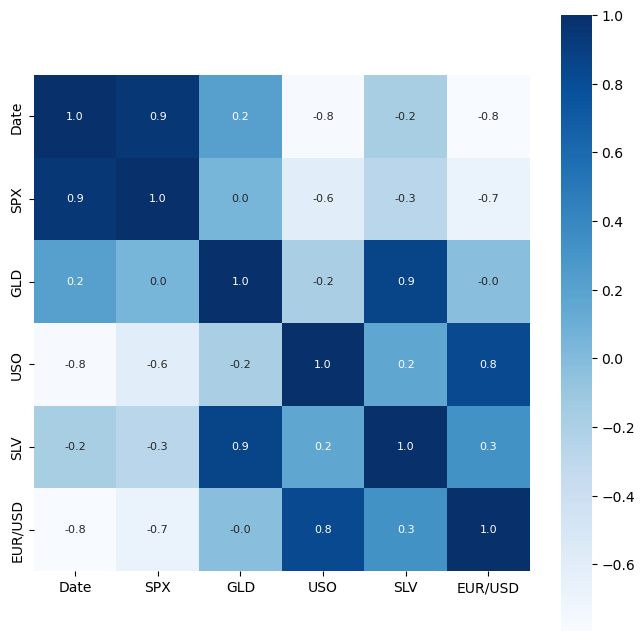

In [22]:
#Constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [24]:
#Correlation values of GLD
print(corr['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


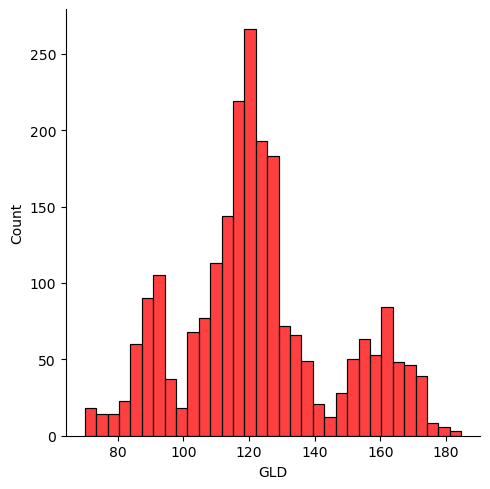

In [25]:
#Checking the distribution of the GLD price
sns.displot(gold_data['GLD'],color='red')

Splitting the feeatures and the target

In [26]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [27]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [28]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and testing data

In [29]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

In [30]:
#Random Forest Regression
regressor = RandomForestRegressor(n_estimators=100)

In [31]:
#traning the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [32]:
#Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [33]:
print(test_data_prediction)

[168.19539905  81.92779992 115.83209993 127.75780115 120.86030129
 154.88359738 150.43459923 126.20250031 117.5158989  125.94640092
 116.72300087 172.31040116 141.91059817 167.86649866 115.19240016
 117.38490022 139.79340272 169.8706011  159.66170269 156.89129916
 155.08960046 125.12360026 176.36669991 156.73400332 125.21750058
  93.76380007  77.26110029 120.53190001 119.08569941 167.50879976
  88.24050024 125.29520018  91.23600051 117.53830045 121.18399918
 135.96230091 115.31020159 114.8857008  146.74899945 107.0124008
 104.47950242  87.08639766 126.40210064 118.03730002 152.1442989
 119.58439976 108.27340032 108.15279827  93.11200034 127.16229754
  75.00920039 113.68519949 121.15020007 111.2754994  118.91109911
 120.30909923 158.71830011 168.82760041 147.04499725  86.020199
  94.32580023  86.69569909  90.40070031 119.05970048 126.4300005
 127.54589987 168.89040002 122.29929923 117.50649872  98.61040011
 168.55190172 143.25909841 131.52470227 121.06410242 121.16909942
 119.67010056 1

In [34]:
#R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9885959196703825


Compare the actual valuess and predicted vaalues in a plot

In [35]:
Y_test = list(Y_test)

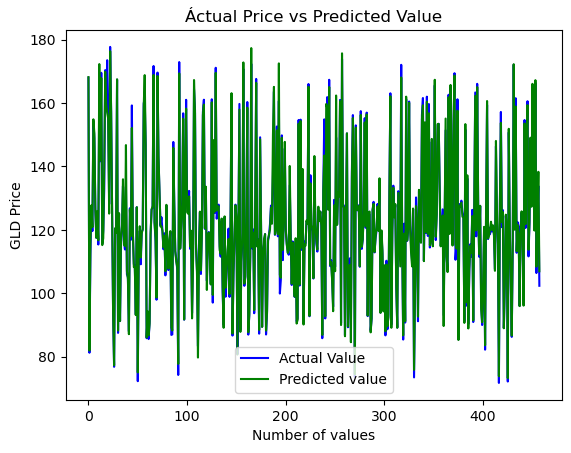

In [36]:
plt.plot(Y_test, color='blue' , label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title('Áctual Price vs Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()